In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
probs = [
    [0.1, 0.02],
    [0.02, 0.1],
]
n1 = 50
n2 = 50
n = n1 + n2
G = nx.stochastic_block_model([n1, n2], probs, seed=0)

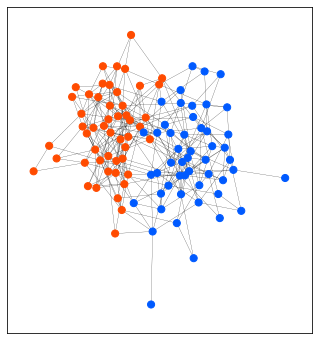

In [3]:
# グラフの図示
pos = nx.layout.spring_layout(G, seed=3)
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 2, 1)
c = []
for i in range(n):
    if i < n1:
        c.append('#ff4b00')
    else:
        c.append('#005aff')
nx.draw_networkx(G, pos, ax=ax, with_labels=False, width=0.2, node_size=50, node_color=c)

In [4]:
W = nx.adjacency_matrix(G).todense() # 隣接行列
D = np.diag(W.sum(1)) # 次数行列

In [5]:
eigval, eigvec = np.linalg.eigh(W + D)
npos = eigvec[:, -2:] * np.sqrt(np.array([eigval[-2], eigval[-1]])[None, :]) # 式 (2.38)

In [6]:
# 行列分解の図示
ax = fig.add_subplot(1, 2, 2)
c = []
for i in range(n):
    if i < n1:
        c.append('#ff4b00')
    else:
        c.append('#005aff')
ax.scatter(npos[:, 1], npos[:, 0], c=c)

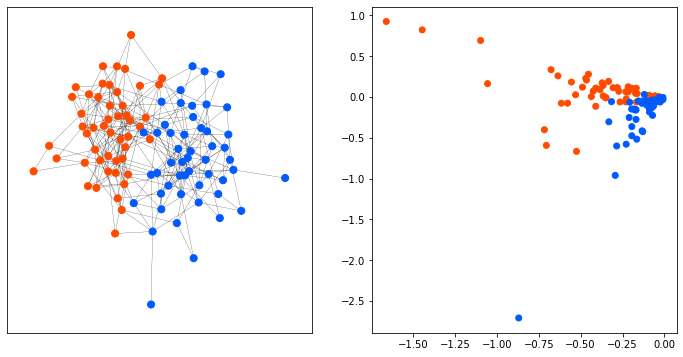

In [7]:
fig